In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# One-hot encoding.
from sklearn.preprocessing import label_binarize
# metrics.
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score, precision_recall_curve

In [2]:
# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

### Criando exemplos de 2 classes.

In [3]:
# Define the number of different classes.
numberOfClasses = 2

# Number of examples.
N = 10000

# Create a 3-class dataset for classification.
centers = [[-4, 0], [4, 0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

Xl = np.c_[np.ones((len(y), 1)), X]

### Plotando as 2 classes.

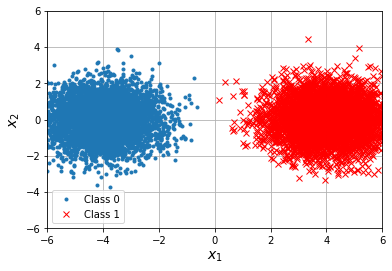

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.show()

### Instanciando e treinando o classificador.

In [5]:
# Instantiate LogisticRegression object.
model = LogisticRegression(tol=1e-10, random_state=seed)

# Train model.
model.fit(Xl, y)

LogisticRegression(random_state=42, tol=1e-10)

### Plotando as regiões de decisão.

**OBS:** Notem que a matriz de atributos criada para plotarmos as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

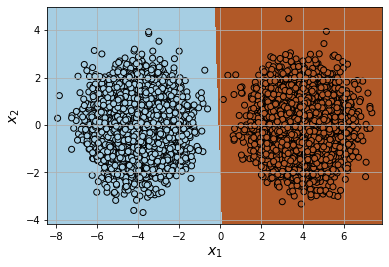

In [6]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()

plt.show()

### Plotando a matriz de confusão.

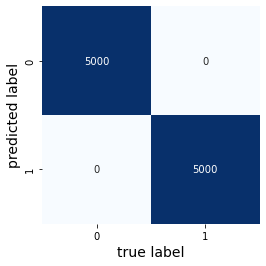

In [7]:
# Predict.
y_pred = model.predict(Xl)

# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.show()

In [8]:
y[0:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [9]:
y_prob = model.predict_proba(Xl)

In [10]:
y_prob

array([[1.09252019e-07, 9.99999891e-01],
       [1.68069526e-06, 9.99998319e-01],
       [9.99999760e-01, 2.39670018e-07],
       ...,
       [9.85149329e-09, 9.99999990e-01],
       [9.99999992e-01, 8.14482615e-09],
       [1.32032347e-06, 9.99998680e-01]])

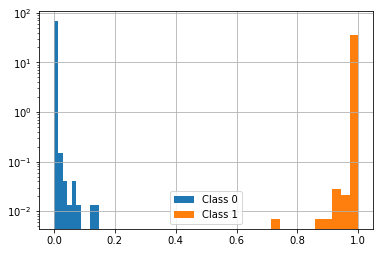

In [11]:
idx0 = y==0
idx1 = y==1

plt.hist(y_prob[idx0,1], bins=10, density=True, label='Class 0')
plt.hist(y_prob[idx1,1], bins=10, density=True, label='Class 1')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

### Criando classes que se sobrepõem

In [43]:
# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

In [44]:
# Define the number of different classes.
numberOfClasses = 2

# Number of examples.
N = 10000

# Create a 3-class dataset for classification.
centers = [[-4, 0], [-2, 0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

Xnew = np.c_[np.ones((len(y), 1)), X]

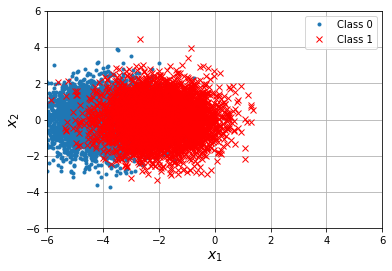

In [45]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.show()

In [46]:
y_prob_new = model.predict_proba(Xnew)

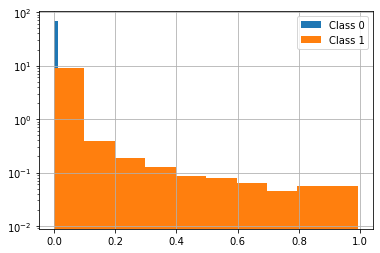

In [47]:
idx0 = y==0
idx1 = y==1

plt.hist(y_prob_new[idx0,1], bins=10, density=True, label='Class 0')
plt.hist(y_prob_new[idx1,1], bins=10, density=True, label='Class 1')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

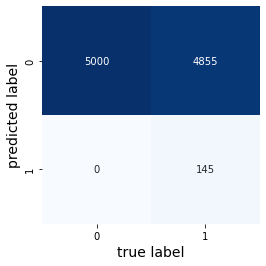

In [48]:
# Predict.
y_pred = model.predict(Xnew)

# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.show()

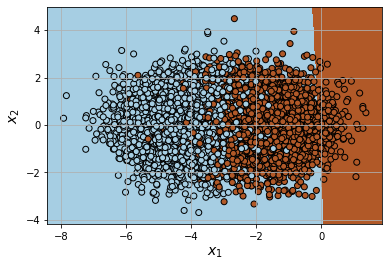

In [49]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()

plt.show()

In [50]:
y

array([1, 1, 0, ..., 1, 0, 1])

In [51]:
y_prob_new

array([[9.88786694e-01, 1.12133056e-02],
       [9.99263368e-01, 7.36632415e-04],
       [9.99999760e-01, 2.39670018e-07],
       ...,
       [8.88285152e-01, 1.11714848e-01],
       [9.99999992e-01, 8.14482615e-09],
       [9.99062498e-01, 9.37502224e-04]])

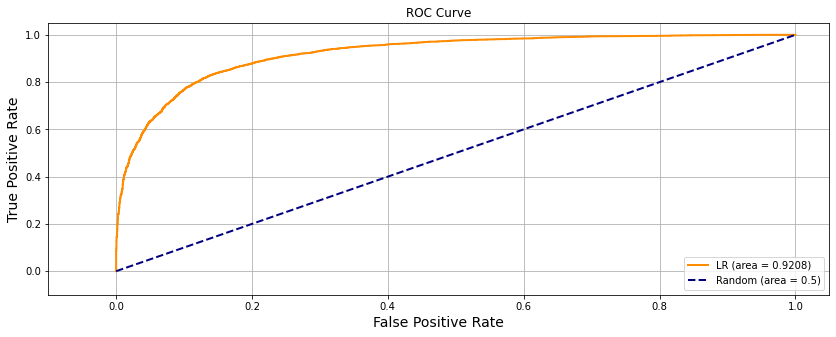

In [54]:
# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(14, 5))
lw = 2

# Calculating ROC curve and ROC AUC.
fpr, tpr, _ = roc_curve(y, y_prob_new[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting ROC curve for class i.
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='LR (area = %1.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random (area = 0.5)')
plt.xlim([-0.1, 1.05])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

plt.show()

### Referências

[1] https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0

[2] https://arogozhnikov.github.io/2015/10/05/roc-curve.html